# AirBnB Seattle Data Analysis
For the Udacity Data Scientist Blog Post an analysis of dataset has to be done.
This notebook is used to analyze the data from AirBnB Seattle provided in Kaggle:

* https://www.kaggle.com/datasets/airbnb/seattle


In [1]:
%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle   
# pycodestyle detects always an W391 "blank line at end of file",
# even if there is exactly one line at the end of the cell.
# therefore it is commented out and only uncommented temporarily,
# for checking the cell.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline


In [3]:
df_cal = pd.read_csv('./data/calendar.csv')
df_cal.head()


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
df_list = pd.read_csv('./data/listings.csv')
df_list.head()   

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
df_rev = pd.read_csv('./data/reviews.csv')
df_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


# Analyze missing values


In [6]:
print(df_cal.shape[0])
df_cal.count() / df_cal.shape[0]

1393570


listing_id    1.00000
date          1.00000
available     1.00000
price         0.67061
dtype: float64

In [7]:
print(df_rev.shape[0])
df_rev.count() / df_rev.shape[0]

84849


listing_id       1.000000
id               1.000000
date             1.000000
reviewer_id      1.000000
reviewer_name    1.000000
comments         0.999788
dtype: float64

In [8]:
print(df_list.shape[0])
df_list.count() / df_list.shape[0]

3818


id                                  1.000000
listing_url                         1.000000
scrape_id                           1.000000
last_scraped                        1.000000
name                                1.000000
                                      ...   
cancellation_policy                 1.000000
require_guest_profile_picture       1.000000
require_guest_phone_verification    1.000000
calculated_host_listings_count      1.000000
reviews_per_month                   0.835778
Length: 92, dtype: float64

In [9]:
df_list.columns[df_list.count() == df_list.shape[0]]

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'experiences_offered', 'picture_url', 'host_id', 'host_url',
       'host_verifications', 'street', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'room_type', 'accommodates', 'bed_type',
       'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'requires_license', 'jurisdiction_names',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count'],
      dtype='object')

In [10]:
df_list[df_list.columns[df_list.count() < df_list.shape[0]]].count() / df_list.shape[0]

summary                        0.953641
space                          0.850969
neighborhood_overview          0.729701
notes                          0.579361
transit                        0.755369
thumbnail_url                  0.916186
medium_url                     0.916186
xl_picture_url                 0.916186
host_name                      0.999476
host_since                     0.999476
host_location                  0.997905
host_about                     0.775013
host_response_time             0.863017
host_response_rate             0.863017
host_acceptance_rate           0.797538
host_is_superhost              0.999476
host_thumbnail_url             0.999476
host_picture_url               0.999476
host_neighbourhood             0.921425
host_listings_count            0.999476
host_total_listings_count      0.999476
host_has_profile_pic           0.999476
host_identity_verified         0.999476
neighbourhood                  0.891042
zipcode                        0.998167


# Question 1 - Is a higher price rectified by a higher customer satisfaction?

## find a measure for customer satisfaction

A measure for the customer satisfaction is the rating which is available in df_list. Next to review_scores_rating there are 6 detail values for checkin, value, communication, ...
Maybe "value" could also be of interest for the question.

Let´s see how many data sets are filled out

In [11]:
df_list[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].count() / df_list.shape[0]

review_scores_rating           0.830540
review_scores_accuracy         0.827658
review_scores_cleanliness      0.828968
review_scores_checkin          0.827658
review_scores_communication    0.829492
review_scores_location         0.828444
review_scores_value            0.828182
dtype: float64

looking at some example data

In [12]:
df_list[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,92.0,9.0,9.0,10.0,10.0,9.0,9.0
...,...,...,...,...,...,...,...
3813,80.0,8.0,10.0,4.0,8.0,10.0,8.0
3814,100.0,10.0,10.0,10.0,10.0,10.0,10.0
3815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3816,NaN,NaN,NaN,NaN,NaN,NaN,NaN


`review_scores_rating` is not a calculated value from the other ratings, because there are two data sets (1 + 2) with identical review scores, but different rating

In [13]:
df_list[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].iloc[[1,2]]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
1,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,97.0,10.0,10.0,10.0,10.0,10.0,10.0


## Select price

there are two fields for price, a weekly and a monthly price

In [14]:
df_list[["weekly_price", "monthly_price"]].count()

weekly_price     2009
monthly_price    1517
dtype: int64

In [15]:
df_list[["weekly_price", "monthly_price"]].count() / df_list.shape[0]

weekly_price     0.526192
monthly_price    0.397328
dtype: float64

Only half of the listings have prices. Lets have a look, if we can enrich the data from the calendar data.
price field is not always filled out, so we can drop all rows without a price:

In [16]:
df_cal.dropna().groupby("listing_id").count()

,date,available,price
listing_id,,,
3335,309,309,309
4291,365,365,365
5682,309,309,309
6606,365,365,365
7369,53,53,53
...,...,...,...
10331249,354,354,354
10332096,365,365,365
10334184,361,361,361


that looks much better, for nearly all listings there are prices. As an estimate we can use the average.
Simply use of mean() for the `price` field results in an error, because the format is a string like "$85.00".


In [17]:
df_cal[["listing_id","price"]].dropna().groupby("listing_id").head()

,listing_id,price
0,241032,$85.00
1,241032,$85.00
9,241032,$85.00
10,241032,$85.00
14,241032,$85.00
...,...,...
1393205,10208623,$87.00
1393206,10208623,$87.00
1393207,10208623,$87.00
1393208,10208623,$87.00


So, before calculating with the price, we have to convert it to float

In [18]:
#%%pycodestyle

def dollar_to_float(dollar_string):
    '''
    convert a currency value like '$85.00' into a float.
    There is no check, that the first character is really a '$' char.

    Input:
    dollar_string: input in format '$NNN.NN'

    Output:
    float value for the given input
    '''
    return float(dollar_string[1:])


dollar_to_float("$85.00")

85.0

Still getting an error, because dollar_to_float throws an exception on some inputs

## remove entries from calender without price

In [19]:
df_cal["price"].dropna().unique()

array(['$85.00', '$125.00', '$154.00', '$164.00', '$165.00', '$150.00',
       '$145.00', '$144.00', '$148.00', '$155.00', '$149.00', '$156.00',
       '$166.00', '$152.00', '$147.00', '$146.00', '$151.00', '$158.00',
       '$168.00', '$169.00', '$192.00', '$175.00', '$162.00', '$171.00',
       '$173.00', '$153.00', '$177.00', '$183.00', '$181.00', '$170.00',
       '$179.00', '$167.00', '$184.00', '$186.00', '$172.00', '$180.00',
       '$190.00', '$178.00', '$196.00', '$197.00', '$202.00', '$198.00',
       '$205.00', '$214.00', '$218.00', '$211.00', '$193.00', '$204.00',
       '$189.00', '$187.00', '$194.00', '$185.00', '$206.00', '$191.00',
       '$207.00', '$208.00', '$188.00', '$200.00', '$209.00', '$210.00',
       '$195.00', '$201.00', '$199.00', '$203.00', '$182.00', '$163.00',
       '$159.00', '$157.00', '$142.00', '$136.00', '$134.00', '$137.00',
       '$143.00', '$135.00', '$141.00', '$130.00', '$138.00', '$133.00',
       '$129.00', '$127.00', '$126.00', '$131.00', '

So, the thousands-seperator causes the problems. lets remove it:

In [20]:
#%%pycodestyle

def dollar_to_float(dollar_string):
    '''
    convert a currency value like '$85.00' into a float.
    There is no check, that the first character is really a '$' char.

    Input:
    dollar_string: input in format '$NNN.NN'

    Output:
    float value for the given input
    '''
    return float(dollar_string[1:].replace(",",""))


dollar_to_float("$1,250.00")

1250.0

In [21]:
df_cal_price = df_cal[["listing_id","price"]].dropna()
df_cal_price["price"] = df_cal_price["price"].apply(dollar_to_float)
df_merge_price = df_cal_price.groupby("listing_id").mean()
df_merge_price

,price
listing_id,
3335,120.000000
4291,82.000000
5682,53.944984
6606,92.849315
7369,85.000000
...,...
10331249,45.000000
10332096,40.000000
10334184,120.000000


Take a look at the distribution:

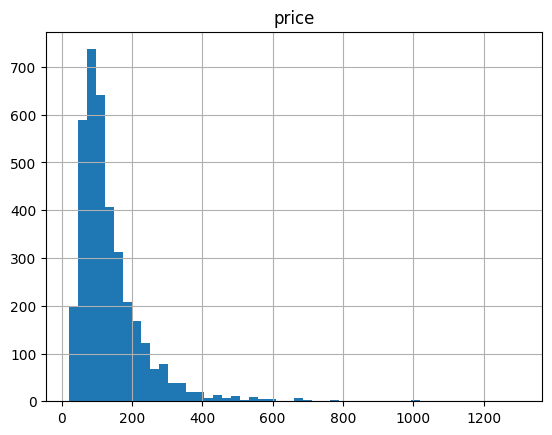

In [22]:
df_merge_price.hist(bins=50);

Compared to the distribution from the weekly price it looks like a good match

<AxesSubplot: >

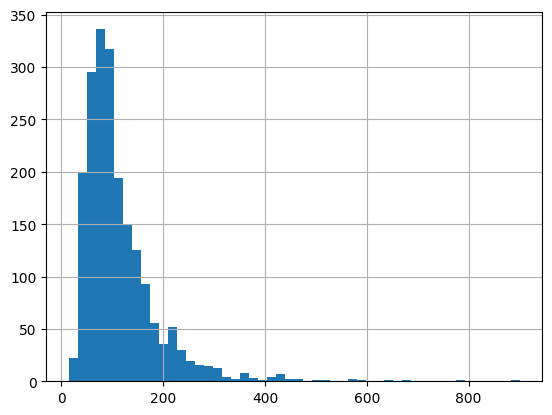

In [23]:
(df_list["weekly_price"].dropna().apply(dollar_to_float)/7).hist(bins=50)

Now putting rating and price (and review_score_value) together

Check that df_cal["listing_id"] is a reference to df_list["id"]

In [24]:
lid_from_cal = set(df_cal["listing_id"].unique())
print(len(lid_from_cal))
lid_from_list = set(df_list["id"].unique())
print(len(lid_from_list))
print(len(lid_from_list.union(lid_from_cal)))

3818
3818
3818


Merge both dataframes together:

In [25]:
#%%pycodestyle
def merge_with_group(df_main, main_ref_column, df_group):
    '''
    This function merges a dataframe which was grouped by the 
    column which is used as a reference to the main dataframe

    Input:
    df_main: outer dataframe
    main_ref_column: column which is used as reference for merging
    df_group: dataframe whichs column are added to df_main,
               index was created from groupby and matches main_ref_column

    Output:
    newly created dataframe where the columns from df_group
    are merged into df_main
    '''
    df_result = df_main.copy()
    df_result = df_main.merge(df_group.reset_index(names=[main_ref_column]),
                              left_on=main_ref_column,
                              right_on=main_ref_column)
    return df_result


In [26]:
df_merge = merge_with_group(df_list[["id", "review_scores_rating", "review_scores_value"]], 'id', df_merge_price)
df_merge = df_merge.dropna()
df_merge

,id,review_scores_rating,review_scores_value,price
0,241032,95.0,10.0,85.000000
1,953595,96.0,10.0,170.931271
2,3308979,97.0,10.0,1301.818182
4,278830,92.0,9.0,462.739726
5,5956968,95.0,10.0,125.629139
...,...,...,...,...
3715,262764,92.0,8.0,191.651982
3716,8578490,100.0,10.0,67.782805
3717,3383329,96.0,10.0,102.818815
3718,8101950,80.0,8.0,359.000000


Now we have the aggregated data we can analyze our question

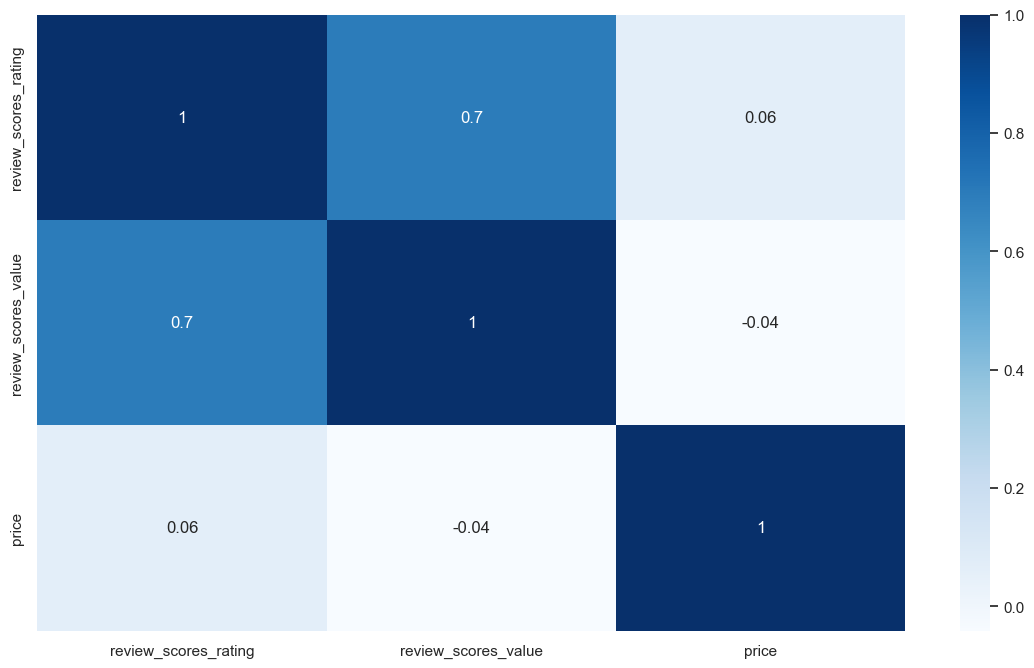

In [27]:
#%%pycodestyle
plt.figure(figsize=(14, 8))
sns.set_theme(style="white")
corr = df_merge.drop(["id"], axis=1).corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')


That was unexpected. It looks like the price and rating are nearly uncorrelated. That "review_score_value" is antiproportional (negative) to price is explainable, because the customer rate the value they get for the price higher, if the price is lower.

# Result

The answer to the question is, that there is no significant correlation between high prices and customer satisfaction